In [1]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-11-07 09:46:54	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-11-07 09:46:54	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-11-07 09:47:20 	Initializing Study
2016-11-07 09:47:20 	Initializing Predictor configuration manager for Study
2016-11-07 09:47:20	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-11-07 09:47:20	Added ExtraTreesClassifier to default predictors
2016-11-07 09:47:20	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-11-07 09:47:20	Added ExtraTreesRegressor to default predictors
2016-11-07 09:47:20	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-11-07 09:47:20	Added Grad

Error loading species hg19 data: HTTP Error 404: Not Found

In [41]:
figure_folder = 'figures/004_Comparison_to_miso'
! mkdir -p $figure_folder

In [2]:
from __future__ import print_function

In [3]:
study.splicing.maybe_renamed_to_feature_id("PKM")

Index([u'exon:chr15:72499069-72499221:-@exon:chr15:72494795-72494961:-@exon:chr15:72492849-72492996:-',
       u'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72492815-72492996:-',
       u'exon:chr15:72523457-72523547:-@exon:chr15:72513509-72513625:-@exon:chr15:72511285-72511451:-',
       u'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'],
      dtype='object')

In [4]:
miso_psi_filename = '/projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnms/splicing.csv.gz'
miso_psi = pd.read_csv(miso_psi_filename, index_col=0, compression='gzip')
print(miso_psi.shape)
miso_psi.head()

(275, 63201)


,chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,chr10:100150839:100150628|100150767:-@chr10:100150355:100150511:-,chr10:100170715:100170370|100170696:-@chr10:100167661:100167754:-,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,chr10:100185575:100185742:-@chr10:100185441|100185477:100185298:-,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,...,chrY:59222127:59222216|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222277|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,chrY:6780129:6780213:+@chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6889490:6889578:+@chrY:6893076:6893183:+@chrY:6911021:6911166:+,chrY:6931938:6932190:+@chrY:6934736:6934869:+@chrY:6938237:6938369:+,chrY:9236076-9236162:+@chrY:9236424-9236561:+,chrY:9365535-9365621:+@chrY:9365883-9366020:+
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.87,0.82,0.94,0.97,NaN,NaN,NaN,NaN,NaN,NaN
M1_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
miso_psi_tidy = miso_psi.unstack().reset_index()
miso_psi_tidy = miso_psi_tidy.rename(columns={'level_0':'miso_id', 'level_1':'sample_id', 0:'miso_psi'})
print(miso_psi_tidy.shape)
miso_psi_tidy = miso_psi_tidy.dropna()
print(miso_psi_tidy.shape)
miso_psi_tidy.head()

(17380275, 3)
(2575320, 3)


,miso_id,sample_id,miso_psi
274,chr10:100148111:100148265:-@chr10:100147622:10...,CVN_35,0.92
487,chr10:100150355:100150511:-@chr10:100148111:10...,N3_10,0.04
549,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15
824,chr10:100150839:100150628|100150767:-@chr10:10...,CVN_35,0.17
1037,chr10:100170715:100170370|100170696:-@chr10:10...,N3_10,0.02


In [6]:
miso_psi_tidy['n_exons'] = miso_psi_tidy['miso_id'].map(lambda x: len(x.split('@')))
miso_psi_tidy.head()

,miso_id,sample_id,miso_psi,n_exons
274,chr10:100148111:100148265:-@chr10:100147622:10...,CVN_35,0.92,3
487,chr10:100150355:100150511:-@chr10:100148111:10...,N3_10,0.04,3
549,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,3
824,chr10:100150839:100150628|100150767:-@chr10:10...,CVN_35,0.17,2
1037,chr10:100170715:100170370|100170696:-@chr10:10...,N3_10,0.02,2


Use only SE and MXE events

In [7]:
miso_psi_tidy = miso_psi_tidy.loc[miso_psi_tidy['n_exons'] >= 3]
miso_psi_tidy.shape

(1606532, 4)

### Merge data only on the alternative exons

In [8]:
outrigger_tidy = study.splicing.data.unstack().reset_index()
outrigger_tidy = outrigger_tidy.rename(columns={'level_0':'outrigger_id', 'level_1':'sample_id', 0:'outrigger_psi'})
print(outrigger_tidy.shape)
outrigger_tidy = outrigger_tidy.dropna()
print(outrigger_tidy.shape)
outrigger_tidy.head()

(3337440, 3)
(979111, 3)


,outrigger_id,sample_id,outrigger_psi
33,exon:chr10:100190328-100190427:-@exon:chr10:10...,CVN_35,1.0
87,exon:chr10:100190328-100190427:-@exon:chr10:10...,M2nd_34,0.0
150,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1.0
154,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0.0
159,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0.0


In [9]:
outrigger_tidy['event_type'] = outrigger_tidy['outrigger_id'].map(lambda x: "SE" if len(x.split('@')) == 3 else "MXE")
outrigger_tidy.head()

,outrigger_id,sample_id,outrigger_psi,event_type
33,exon:chr10:100190328-100190427:-@exon:chr10:10...,CVN_35,1.0,SE
87,exon:chr10:100190328-100190427:-@exon:chr10:10...,M2nd_34,0.0,SE
150,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1.0,SE
154,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0.0,SE
159,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0.0,SE


In [10]:
miso_psi_tidy['event_type'] = miso_psi_tidy['miso_id'].map(lambda x: "SE" if len(x.split('@')) == 3 else "MXE")
miso_psi_tidy.head()

,miso_id,sample_id,miso_psi,n_exons,event_type
274,chr10:100148111:100148265:-@chr10:100147622:10...,CVN_35,0.92,3,SE
487,chr10:100150355:100150511:-@chr10:100148111:10...,N3_10,0.04,3,SE
549,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,3,SE
1356,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,3,SE
1666,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,3,SE


In [11]:
pd.options.display.max_colwidth = 200

In [12]:
outrigger_tidy.query('event_type == "MXE"').head()

,outrigger_id,sample_id,outrigger_psi,event_type
3099,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,M1_06,1.0,MXE
3160,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,M6_03,1.0,MXE
3190,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,N3_04,0.0,MXE
3207,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,P1_03,0.0,MXE
3208,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,P1_04,1.0,MXE


### Get only alternative exon
#### Outrigger

In [13]:
def get_alternative_exon(row):
    if row['event_type'] == 'SE':
        return row['outrigger_id'].split('@')[1]
    else:
        return '@'.join(row['outrigger_id'].split('@')[1:3])
        

outrigger_tidy['alternative_exon'] = outrigger_tidy.apply(get_alternative_exon, axis=1)
outrigger_tidy.head()

,outrigger_id,sample_id,outrigger_psi,event_type,alternative_exon
33,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,CVN_35,1.0,SE,exon:chr10:100189548-100189646:-
87,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,M2nd_34,0.0,SE,exon:chr10:100189548-100189646:-
150,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P1_06,1.0,SE,exon:chr10:100189548-100189646:-
154,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P1_10,0.0,SE,exon:chr10:100189548-100189646:-
159,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P2_03,0.0,SE,exon:chr10:100189548-100189646:-


In [14]:
outrigger_tidy.query('event_type == "MXE"').head().values

array([[ 'exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-',
        'M1_06', 1.0, 'MXE',
        'exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-'],
       [ 'exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-',
        'M6_03', 1.0, 'MXE',
        'exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-'],
       [ 'exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-',
        'N3_04', 0.0, 'MXE',
        'exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-'],
       [ 'exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-',
        'P1_03', 0.0, 'MXE',
        'exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-

#### MISO

In [15]:
def miso_split(exon):
    chrom, start, stop, strand = exon.split(':')
    return chrom, start, stop, strand

def coords_to_outrigger_exon(chrom, start, stop, strand):
    return 'exon:{chrom}:{start}-{stop}:{strand}'.format(
        chrom=chrom, start=start, stop=stop, strand=strand)

def miso_alternative_exon(row):
    if row['event_type'] == 'SE':
        exon = row['miso_id'].split('@')[1]
        chrom, start, stop, strand = miso_split(exon)
        return coords_to_outrigger_exon(chrom, start, stop, strand)
    else:
        exons = row['miso_id'].split('@')[1:3]
        coords = map(miso_split, exons)
        outrigger_exons = map(lambda x: coords_to_outrigger_exon(*x), coords)
        return '@'.join(outrigger_exons)
    
miso_psi_tidy['alternative_exon'] = miso_psi_tidy.apply(miso_alternative_exon, axis=1)
miso_psi_tidy.head()

,miso_id,sample_id,miso_psi,n_exons,event_type,alternative_exon
274,chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,CVN_35,0.92,3,SE,exon:chr10:100147622-100147841:-
487,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,N3_10,0.04,3,SE,exon:chr10:100148111-100148265:-
549,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,CVN_35,0.15,3,SE,exon:chr10:100148111-100148265:-
1356,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,CVN_17,0.09,3,SE,exon:chr10:100174489-100174591:-
1666,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,M2_05,0.94,3,SE,exon:chr10:100185575-100185742:-


In [16]:
miso_psi_tidy.query('event_type == "MXE"').head().values

array([[ 'chr10:101379802:101380221:-@chr10:101373453:101373681:-@chr10:101372300:101372356:-@chr10:101370642:101371215:-',
        'M2_12', 1.0, 4, 'MXE',
        'exon:chr10:101373453-101373681:-@exon:chr10:101372300-101372356:-'],
       [ 'chr10:101379802:101380221:-@chr10:101373453:101373681:-@chr10:101372300:101372356:-@chr10:101370642:101371215:-',
        'MSA_01', 0.0, 4, 'MXE',
        'exon:chr10:101373453-101373681:-@exon:chr10:101372300-101372356:-'],
       [ 'chr10:101379802:101380221:-@chr10:101373453:101373681:-@chr10:101372300:101372356:-@chr10:101370642:101371215:-',
        'MSA_08', 0.01, 4, 'MXE',
        'exon:chr10:101373453-101373681:-@exon:chr10:101372300-101372356:-'],
       [ 'chr10:101379802:101380221:-@chr10:101373453:101373681:-@chr10:101372300:101372356:-@chr10:101370642:101371215:-',
        'N1_04', 0.01, 4, 'MXE',
        'exon:chr10:101373453-101373681:-@exon:chr10:101372300-101372356:-'],
       [ 'chr10:101379802:101380221:-@chr10:101373453:101373

In [17]:
# outrigger_tidy['outrigger_id'].head().values

In [18]:
# rows = outrigger_tidy['outrigger_id'].str.startswith('exon:chr10:1001503')
# outrigger_tidy['outrigger_id'][rows].head().values

In [19]:
# miso_psi_tidy['miso_id'].head().values

In [45]:
import re

s = 'exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-'
pattern = '-(?=\d)'
re.sub(pattern, ':', s)

'exon:chr10:100190328:100190427:-@exon:chr10:100189548:100189646:-@exon:chr10:100189330:100189399:-'

In [46]:
outrigger_tidy['miso_id'] = outrigger_tidy['outrigger_id'].map(lambda x: re.sub(pattern, ':', x).replace('exon:', ''))
outrigger_tidy.head()

,outrigger_id,sample_id,outrigger_psi,event_type,alternative_exon,miso_id
33,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,CVN_35,1.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-
87,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,M2nd_34,0.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-
150,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P1_06,1.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-
154,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P1_10,0.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-
159,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P2_03,0.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-


In [22]:
# outrigger_tidy['miso_id'].head().values

In [23]:
%pdb

Automatic pdb calling has been turned ON


In [47]:

# merge_cols = ['alternative_exon', 'sample_id', 'event_type']
merge_cols = ['sample_id', 'event_type', 'miso_id']

# miso_psi_tidy_index = miso_psi_tidy.set_index(merge_cols)

# splicing_tidy = outrigger_tidy.join(miso_psi_tidy_index, on=merge_cols, how='outer')
# print(splicing_tidy.shape)
# splicing_tidy.head()


splicing_tidy = outrigger_tidy.merge(miso_psi_tidy, left_on=merge_cols, right_on=merge_cols, how='outer')
print(splicing_tidy.shape)
splicing_tidy.head()

(2412159, 9)


,outrigger_id,sample_id,outrigger_psi,event_type,alternative_exon_x,miso_id,miso_psi,n_exons,alternative_exon_y
0,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,CVN_35,1.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.76,3.0,exon:chr10:100189548-100189646:-
1,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,M2nd_34,0.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,NaN,NaN,NaN
2,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P1_06,1.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,NaN,NaN,NaN
3,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P1_10,0.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.03,3.0,exon:chr10:100189548-100189646:-
4,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P2_03,0.0,SE,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.02,3.0,exon:chr10:100189548-100189646:-


In [48]:
# splicing_tidy = splicing_tidy.fillna(-0.1)
# splicing_tidy.head()

In [49]:
print(splicing_tidy.shape)
splicing_tidy = splicing_tidy.drop(['n_exons', 'event_type'], axis=1)
splicing_tidy = splicing_tidy.dropna()
print(splicing_tidy.shape)
splicing_tidy.head()

(2412159, 9)
(173484, 7)


,outrigger_id,sample_id,outrigger_psi,alternative_exon_x,miso_id,miso_psi,alternative_exon_y
0,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,CVN_35,1.0,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.76,exon:chr10:100189548-100189646:-
3,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P1_10,0.0,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.03,exon:chr10:100189548-100189646:-
4,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P2_03,0.0,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.02,exon:chr10:100189548-100189646:-
5,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P2_06,1.0,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,1.00,exon:chr10:100189548-100189646:-
6,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,P2_10,0.0,exon:chr10:100189548-100189646:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.00,exon:chr10:100189548-100189646:-


In [50]:
splicing_tidy_subset = splicing_tidy.query('sample_id == "N2_06"')
splicing_tidy_subset.head()

,outrigger_id,sample_id,outrigger_psi,alternative_exon_x,miso_id,miso_psi,alternative_exon_y
2087,exon:chr10:1038429-1038599:+@exon:chr10:1041869-1041972:+@exon:chr10:1042046-1042182:+,N2_06,1.0,exon:chr10:1041869-1041972:+,chr10:1038429:1038599:+@chr10:1041869:1041972:+@chr10:1042046:1042182:+,1.00,exon:chr10:1041869-1041972:+
2982,exon:chr10:104241758-104241932:-@exon:chr10:104241594-104241655:-@exon:chr10:104240889-104240929:-,N2_06,1.0,exon:chr10:104241594-104241655:-,chr10:104241758:104241932:-@chr10:104241594:104241655:-@chr10:104240889:104240929:-,0.92,exon:chr10:104241594-104241655:-
11263,exon:chr10:12252289-12252321:+@exon:chr10:12257739-12257834:+@exon:chr10:12259360-12259466:+,N2_06,1.0,exon:chr10:12257739-12257834:+,chr10:12252289:12252321:+@chr10:12257739:12257834:+@chr10:12259360:12259466:+,0.99,exon:chr10:12257739-12257834:+
13869,exon:chr10:13151112-13151288:+@exon:chr10:13152274-13152476:+@exon:chr10:13154453-13154635:+,N2_06,1.0,exon:chr10:13152274-13152476:+,chr10:13151112:13151288:+@chr10:13152274:13152476:+@chr10:13154453:13154635:+,1.00,exon:chr10:13152274-13152476:+
15324,exon:chr10:15880227-15880278:-@exon:chr10:15879541-15879632:-@exon:chr10:15879203-15879317:-,N2_06,0.0,exon:chr10:15879541-15879632:-,chr10:15880227:15880278:-@chr10:15879541:15879632:-@chr10:15879203:15879317:-,0.02,exon:chr10:15879541-15879632:-


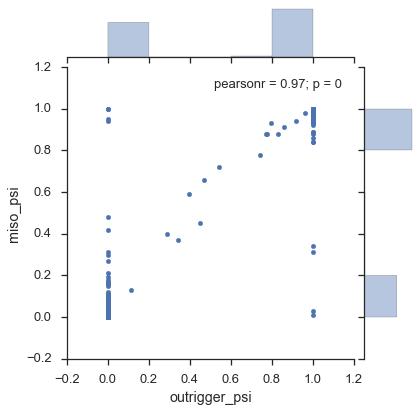

In [51]:
sns.jointplot(x='outrigger_psi', y='miso_psi', data=splicing_tidy_subset)

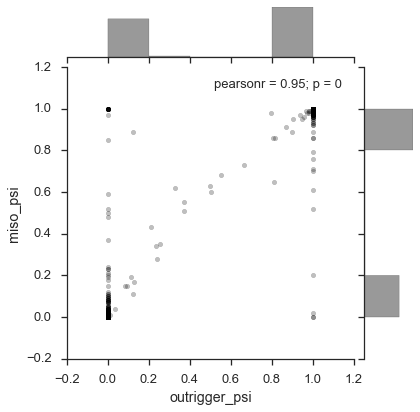

In [61]:
splicing_tidy_subset = splicing_tidy.query('sample_id == "P9_02"')
g = sns.jointplot(x='outrigger_psi', y='miso_psi', data=splicing_tidy_subset, joint_kws=dict(alpha=0.25), color='k')
g.savefig('{}/p9_02_outrigger_vs_miso_full_events.pdf'.format(figure_folder))

In [53]:
inconsistent_events = splicing_tidy_subset.query('abs(outrigger_psi - miso_psi) > 0.5')
print(inconsistent_events.shape)
inconsistent_events.head()

(21, 7)


,outrigger_id,sample_id,outrigger_psi,alternative_exon_x,miso_id,miso_psi,alternative_exon_y
530,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,P9_02,0.000000,exon:chr10:102016019-102016233:-,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,0.59,exon:chr10:102016019-102016233:-
104518,exon:chr12:120636657-120636803:-@exon:chr12:120636357-120636434:-@exon:chr12:120635125-120635265:-,P9_02,0.000000,exon:chr12:120636357-120636434:-,chr12:120636657:120636803:-@chr12:120636357:120636434:-@chr12:120635125:120635265:-,1.00,exon:chr12:120636357-120636434:-
133054,exon:chr12:53689623-53689725:+@exon:chr12:53690028-53690059:+@exon:chr12:53690214-53690251:+@exon:chr12:53691634-53691708:+,P9_02,1.000000,exon:chr12:53690028-53690059:+@exon:chr12:53690214-53690251:+,chr12:53689623:53689725:+@chr12:53690028:53690059:+@chr12:53690214:53690251:+@chr12:53691634:53691708:+,0.00,exon:chr12:53690028-53690059:+@exon:chr12:53690214-53690251:+
133258,exon:chr12:53689623-53689725:+@exon:chr12:53690028-53690059:+@exon:chr12:53690214-53690335:+@exon:chr12:53691634-53691708:+,P9_02,1.000000,exon:chr12:53690028-53690059:+@exon:chr12:53690214-53690335:+,chr12:53689623:53689725:+@chr12:53690028:53690059:+@chr12:53690214:53690335:+@chr12:53691634:53691708:+,0.00,exon:chr12:53690028-53690059:+@exon:chr12:53690214-53690335:+
175637,exon:chr13:76111800-76111811:-@exon:chr13:76104447-76104544:-@exon:chr13:76104250-76104402:-@exon:chr13:76100572-76100775:-,P9_02,0.124311,exon:chr13:76104447-76104544:-@exon:chr13:76104250-76104402:-,chr13:76111800:76111811:-@chr13:76104447:76104544:-@chr13:76104250:76104402:-@chr13:76100572:76100775:-,0.89,exon:chr13:76104447-76104544:-@exon:chr13:76104250-76104402:-


In [43]:
figure_folder

'figures/004_Comparison_to_miso'

In [54]:
inconsistent_events.to_csv('{}/p9_02_inconsistent_events.csv'.format(figure_folder), index=False)

In [39]:
tidy_splicing = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/junction_reads_use_multimapping.csv')
print(tidy_splicing.shape)
tidy_splicing.head()

,chrom,junction_start,junction_stop,strand,junction_motif,annotated,unique_junction_reads,multimap_junction_reads,max_overhang,junction_location,sample_id,junction_id,exon_start,exon_stop,reads
0,chr1,14830.0,14969.0,-,GT/AG,True,0.0,1.0,35.0,chr1:14830-14969:-,CVN_09,junction:chr1:14830-14969:-,14970.0,14829.0,1.0
1,chr1,15039.0,15795.0,-,GT/AG,True,0.0,1.0,49.0,chr1:15039-15795:-,CVN_09,junction:chr1:15039-15795:-,15796.0,15038.0,1.0
2,chr1,228777.0,237053.0,-,GT/AG,True,2.0,12.0,48.0,chr1:228777-237053:-,CVN_09,junction:chr1:228777-237053:-,237054.0,228776.0,14.0
3,chr1,320654.0,324287.0,+,GT/AG,True,0.0,1.0,28.0,chr1:320654-324287:+,CVN_09,junction:chr1:320654-324287:+,324288.0,320653.0,1.0
4,chr1,320939.0,321031.0,+,GT/AG,True,0.0,3.0,39.0,chr1:320939-321031:+,CVN_09,junction:chr1:320939-321031:+,321032.0,320938.0,3.0


In [55]:
tidy_splicing_subset = tidy_splicing.query('sample_id == "P9_02"')
print(tidy_splicing_subset.shape)
tidy_splicing_subset.head()

(33034, 15)


,chrom,junction_start,junction_stop,strand,junction_motif,annotated,unique_junction_reads,multimap_junction_reads,max_overhang,junction_location,sample_id,junction_id,exon_start,exon_stop,reads
2895638,chr1,17056.0,17232.0,-,GT/AG,True,0.0,1.0,44.0,chr1:17056-17232:-,P9_02,junction:chr1:17056-17232:-,17233.0,17055.0,1.0
2895639,chr1,125666.0,652024.0,+,GT/AG,False,0.0,26.0,44.0,chr1:125666-652024:+,P9_02,junction:chr1:125666-652024:+,652025.0,125665.0,26.0
2895640,chr1,135145.0,137677.0,-,GT/AG,False,0.0,1.0,12.0,chr1:135145-137677:-,P9_02,junction:chr1:135145-137677:-,137678.0,135144.0,1.0
2895641,chr1,135420.0,138138.0,+,GC/AG,False,30.0,30.0,44.0,chr1:135420-138138:+,P9_02,junction:chr1:135420-138138:+,138139.0,135419.0,60.0
2895642,chr1,138284.0,139384.0,-,GC/AG,False,0.0,121.0,41.0,chr1:138284-139384:-,P9_02,junction:chr1:138284-139384:-,139385.0,138283.0,121.0


In [60]:
tidy_splicing_subset.query('(chrom == "chr13") & (junction_start > 76099827) & (junction_stop < 76112147)')

,chrom,junction_start,junction_stop,strand,junction_motif,annotated,unique_junction_reads,multimap_junction_reads,max_overhang,junction_location,sample_id,junction_id,exon_start,exon_stop,reads
2917582,chr13,76100776.0,76104249.0,-,GT/AG,True,3586.0,1.0,49.0,chr13:76100776-76104249:-,P9_02,junction:chr13:76100776-76104249:-,76104250.0,76100775.0,3587.0
2917583,chr13,76100776.0,76104446.0,-,GT/AG,True,611.0,3.0,50.0,chr13:76100776-76104446:-,P9_02,junction:chr13:76100776-76104446:-,76104447.0,76100775.0,614.0
2917584,chr13,76104403.0,76111799.0,-,GT/AG,True,2606.0,0.0,12.0,chr13:76104403-76111799:-,P9_02,junction:chr13:76104403-76111799:-,76111800.0,76104402.0,2606.0
2917585,chr13,76104542.0,76111799.0,-,GT/AG,True,1.0,1.0,10.0,chr13:76104542-76111799:-,P9_02,junction:chr13:76104542-76111799:-,76111800.0,76104541.0,2.0
2917586,chr13,76104545.0,76111799.0,-,GT/AG,True,268.0,0.0,12.0,chr13:76104545-76111799:-,P9_02,junction:chr13:76104545-76111799:-,76111800.0,76104544.0,268.0
2917587,chr13,76111812.0,76111899.0,-,GT/AG,True,2876.0,0.0,20.0,chr13:76111812-76111899:-,P9_02,junction:chr13:76111812-76111899:-,76111900.0,76111811.0,2876.0


In [58]:
tidy_splicing_subset.query('(chrom == "chr14") & (junction_start > 50303342) & (junction_stop < 50314273)')

,chrom,junction_start,junction_stop,strand,junction_motif,annotated,unique_junction_reads,multimap_junction_reads,max_overhang,junction_location,sample_id,junction_id,exon_start,exon_stop,reads
2918235,chr14,50304925.0,50307435.0,-,GT/AG,True,1418.0,1.0,50.0,chr14:50304925-50307435:-,P9_02,junction:chr14:50304925-50307435:-,50307436.0,50304924.0,1419.0
2918236,chr14,50304925.0,50312857.0,-,GT/AG,True,82.0,1.0,3.0,chr14:50304925-50312857:-,P9_02,junction:chr14:50304925-50312857:-,50312858.0,50304924.0,83.0
2918237,chr14,50307535.0,50312857.0,-,GT/AG,False,1059.0,0.0,50.0,chr14:50307535-50312857:-,P9_02,junction:chr14:50307535-50312857:-,50312858.0,50307534.0,1059.0


In [ ]:
splicing_tidy_subset = splicing_tidy.query('sample_id == "M6_07"')
sns.jointplot(x='outrigger_psi', y='miso_psi', data=splicing_tidy_subset, joint_kws=dict(alpha=0.25), color='k')

In [ ]:
splicing_tidy_subset = splicing_tidy.query('sample_id == "M2_05"')
sns.jointplot(x='outrigger_psi', y='miso_psi', data=splicing_tidy_subset, alpha=0.25, color='k')